In [1]:
import matplotlib.pyplot as plt
import numpy as np

class LinearRegression:
    def __init__(self, max_iter=1000, learning_rate=0.00001):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.score = None
        self.intercept = None
        self.slope = None
      
    def fit(self, X, y):
        n = float(len(X))
        precision = 0.000001
        self.intercept = 0 # initialize the intercept
        self.slope = 0 # initialize the slope
        
        for iteration in range(self.max_iter):
                prev_slope = np.copy(self.slope) # save the previous values of the slope and the intercept
                
                # update the slope and the intercept after each iteration by subtracting
                # the partial derivatives as they point in direction of steepest ascent
                self.intercept -= self.learning_rate * ((1/n) * sum(-2*(y - (self.intercept + self.slope*X))))
                self.slope -= self.learning_rate * ((1/n) * sum(-2*X * (y - (self.intercept + self.slope*X))))
                
                # compute the MSE score
                self.score = (1/n) * np.sum(np.square(y - (self.intercept + self.slope*X)))

                step = prev_slope - self.slope # check for difference in the slope value after update
                if abs(step) <= precision: # if the slope value does not change much at next iteration, stop the gradient descent
                    print(f'The algorithm converged after {iteration} iterations.')
                    break    
                    
    # make predictions based on the fit                  
    def predict(self,data_list):
        y_pred = self.intercept + self.slope*data_list
        return y_pred        

Now, we can test the class on a generated dataset

In [2]:
mu, sigma = 100, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)

error = np.random.normal(100, 1, 100)
y = 0 + 1*x + error

In [3]:
x = x.reshape(100,1)
y = y.reshape(100,1)

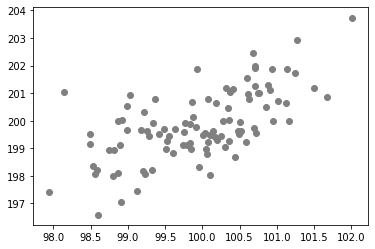

In [4]:
plt.scatter(x, y, color='gray')
plt.show()

Fit the class on the dataset and check the MSE score

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

The algorithm converged after 58 iterations.


In [6]:
lin_reg.score

1.685463892026311

Plot the regression line

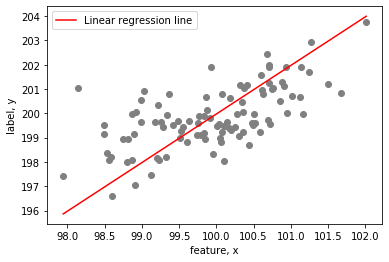

In [7]:
y_pred = lin_reg.predict(x)

plt.scatter(x, y, color = 'gray') # actual values
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red', label="Linear regression line")  # regression line
plt.xlabel("feature, x")
plt.ylabel("label, y")
plt.legend()
plt.show()